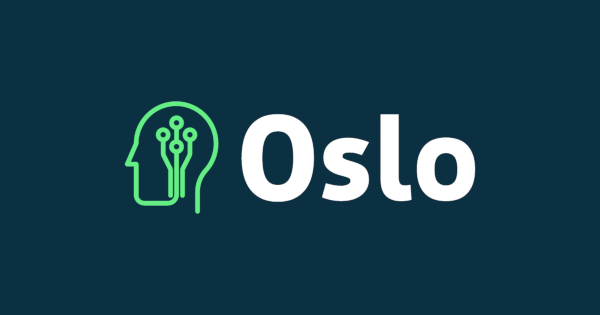

# Train YOLOV8 Classification model on custom dataset from Oslo

This notebook is a simple example of how to pull your exported object detection dataset from Oslo and train a YOLOv8 model using the Ultralytics library.

You need to have the following information to run this notebook:

- `project_identifier`: The identifier of the project you want to use, you can find this on the project page in Oslo.
- `access_token`: Your personal access token, you can find this in your organization settings in Oslo.
- `version`: The version of the dataset you want to use, you can find this on the exports page in Oslo.

It is a good idea to check that you have GPU available first.


In [ ]:
!nvidia-smi

Mon Dec 30 19:44:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -U ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
import os

HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:

!pip3 install -U oslovision

from oslovision import OsloVision

project_identifier = "[YOUR_PROJECT_IDENTIFIER]"
access_token = "[YOUR_ACCESS_TOKEN]"
dataset_version = "[YOUR_DATASET_VERSION]"

oslo = OsloVision(access_token)

# Download dataset
dataset_path = oslo.download_export(project_identifier, dataset_version, HOME)
# Unzip the dataset and check the contents
print(dataset_path)

/content/dogs-cats-foxes-folder-3


In [ ]:
# Train the model
!yolo task=classify mode=train model=yolov8l-cls.pt data=$dataset_path epochs=100 imgsz=640 plots=True

100% 71.7M/71.7M [00:01<00:00, 43.0MB/s]
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/content/dogs-cats-foxes-folder-3, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

In [ ]:
!ls {HOME}/runs/classify/train/

args.yaml					    train_batch1.jpg	   val_batch1_labels.jpg
confusion_matrix_normalized.png			    train_batch2970.jpg    val_batch1_pred.jpg
confusion_matrix.png				    train_batch2971.jpg    val_batch2_labels.jpg
events.out.tfevents.1735587927.3e945bcd3d59.1399.0  train_batch2972.jpg    val_batch2_pred.jpg
results.csv					    train_batch2.jpg	   weights
results.png					    val_batch0_labels.jpg
train_batch0.jpg				    val_batch0_pred.jpg


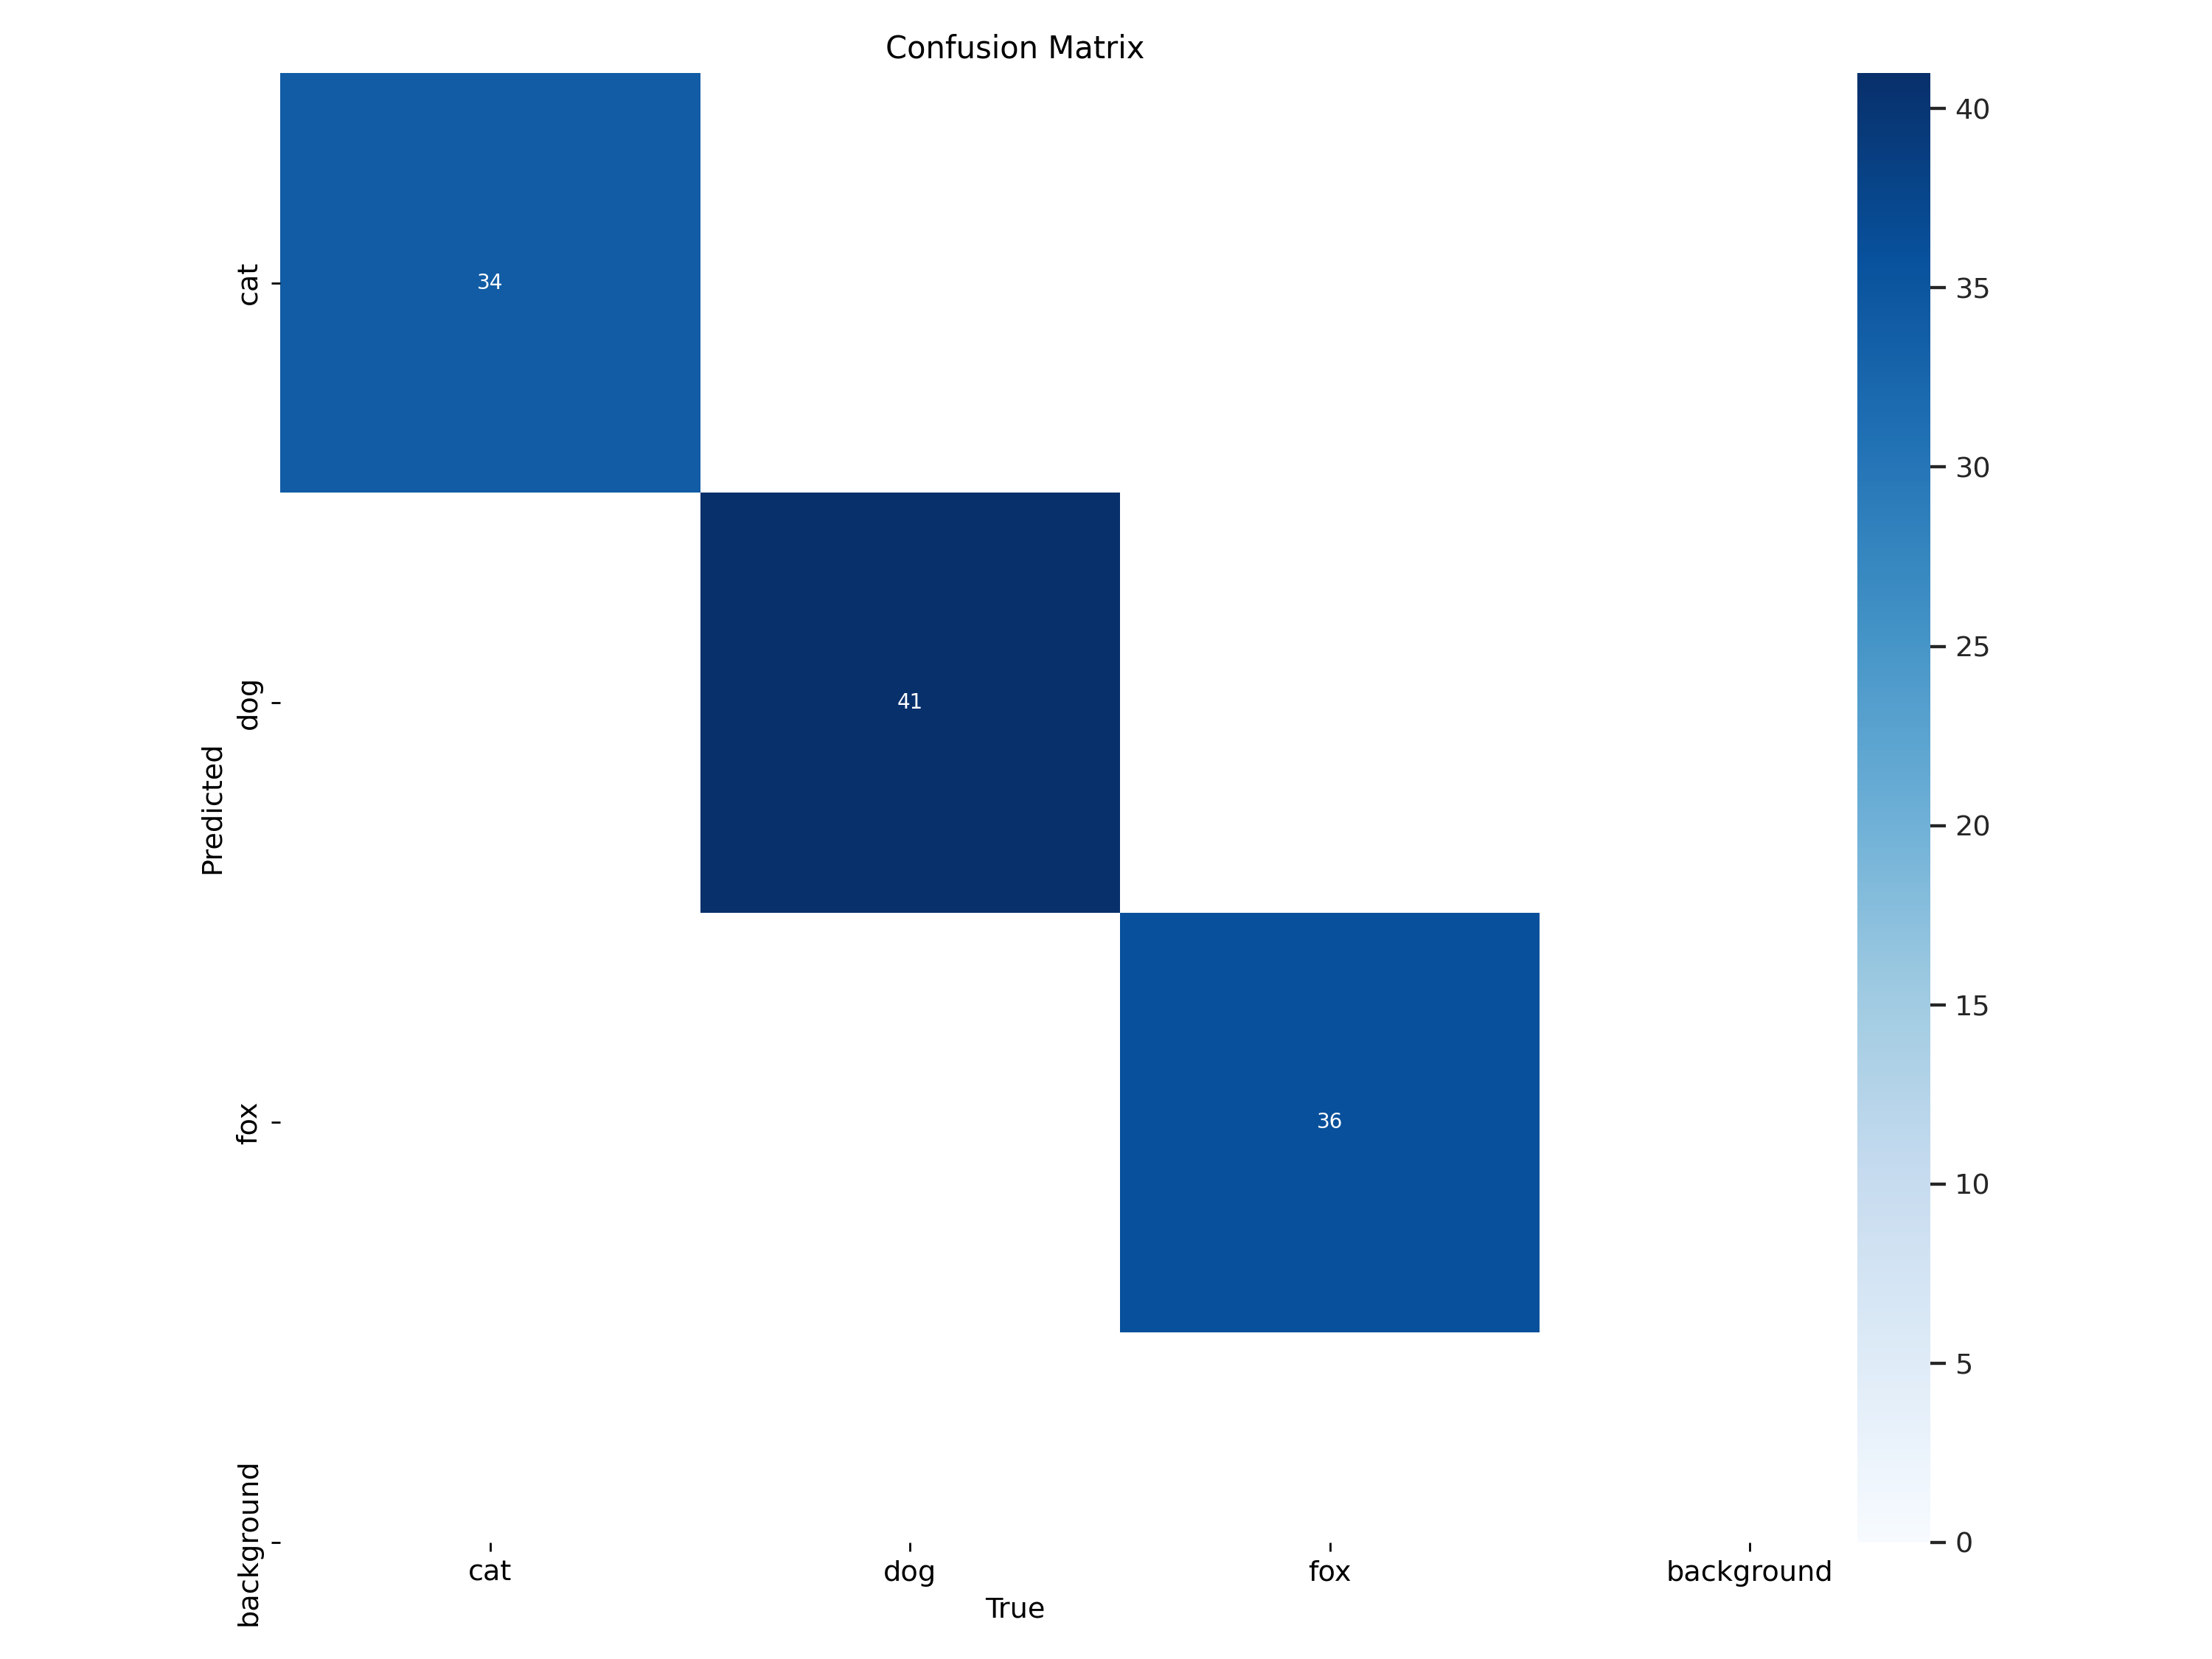

In [ ]:
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/classify/train/confusion_matrix.png', width=600)

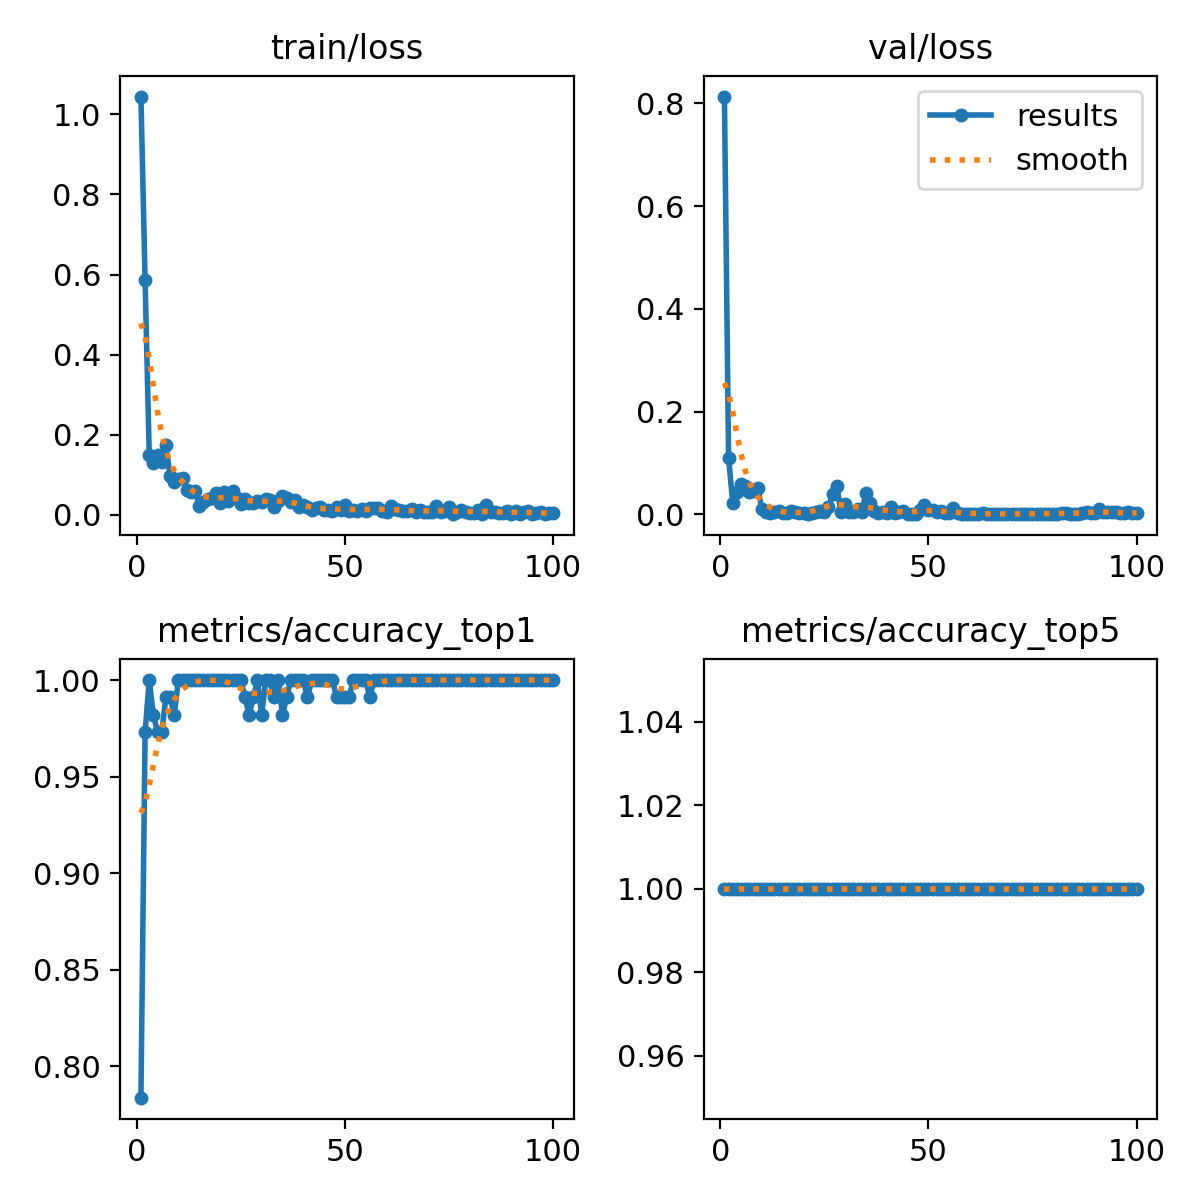

In [ ]:
Image(filename=f'{HOME}/runs/classify/train/results.png', width=600)

# Validate the model

We can run validation on the model to see how well it performs. This will give us the mAP score which is the mean average precision. This is a good metric to see how well the model is performing.

In [ ]:

!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data=$dataset_path

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36,188,419 parameters, 0 gradients, 98.7 GFLOPs
train: /content/dogs-cats-foxes-folder-3/train... found 517 images in 3 classes ✅ 
val: /content/dogs-cats-foxes-folder-3/val... found 111 images in 3 classes ✅ 
test: /content/dogs-cats-foxes-folder-3/test... found 111 images in 3 classes ✅ 
val: Scanning /content/dogs-cats-foxes-folder-3/val... 111 images, 0 corrupt: 100% 111/111 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 7/7 [00:04<00:00,  1.60it/s]
                   all          1          1
Speed: 6.9ms preprocess, 23.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:

!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source=$dataset_path/test/fox save=True
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source=$dataset_path/test/cat save=True
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source=$dataset_path/test/dog save=True

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36,188,419 parameters, 0 gradients, 98.7 GFLOPs

image 1/40 /content/dogs-cats-foxes-folder-3/test/fox/fox004_jpg.rf.165cb2ddac5b29f2c4dcb7488ae46d86.23097f2223ef.jpg: 640x640 fox 1.00, cat 0.00, dog 0.00, 40.0ms
image 2/40 /content/dogs-cats-foxes-folder-3/test/fox/fox007_jpeg.rf.fb1db2a0fe1cc664ecf5be9cb5dd0ebd.f25e52e4a42b.jpg: 640x640 fox 1.00, cat 0.00, dog 0.00, 40.1ms
image 3/40 /content/dogs-cats-foxes-folder-3/test/fox/fox009_jpeg.rf.da5ff199b9b8ac4ce75f40a4847c2ef6.0e6b0172e762.jpg: 640x640 fox 1.00, cat 0.00, dog 0.00, 40.0ms
image 4/40 /content/dogs-cats-foxes-folder-3/test/fox/fox014_jpeg.rf.1d0e4f9d9420a00762eefcac7c35c791.423997fe3147.jpg: 640x640 fox 1.00, dog 0.00, cat 0.00, 40.0ms
image 5/40 /content/dogs-cats-foxes-folder-3/test/fox/fox015_jpeg.rf.ca4e82207c5334fd3633169aefe1fe17.17faddb953b0.jpg: 640x640 fox 1.00, dog 0.00, cat 0.00, 28.6ms
imag

# Visualize the predictions

Lets look at some of the predictions made by the model on the test set.

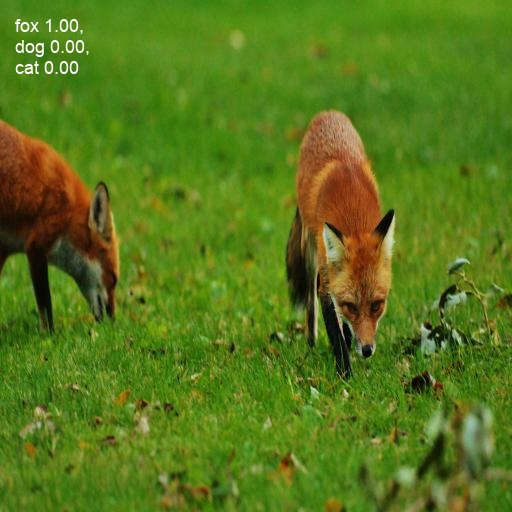

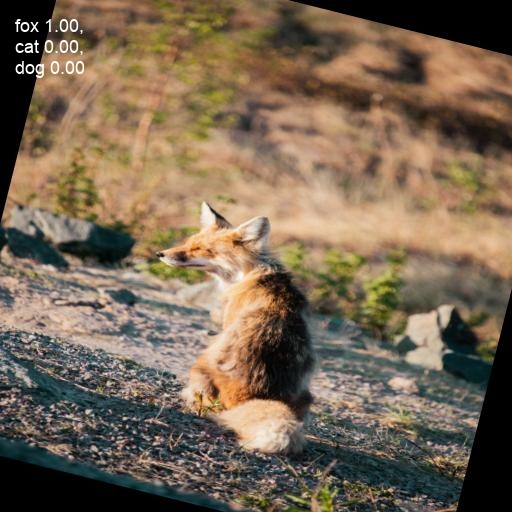

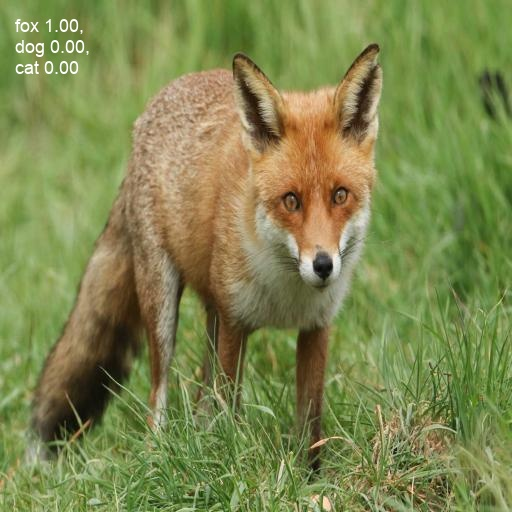

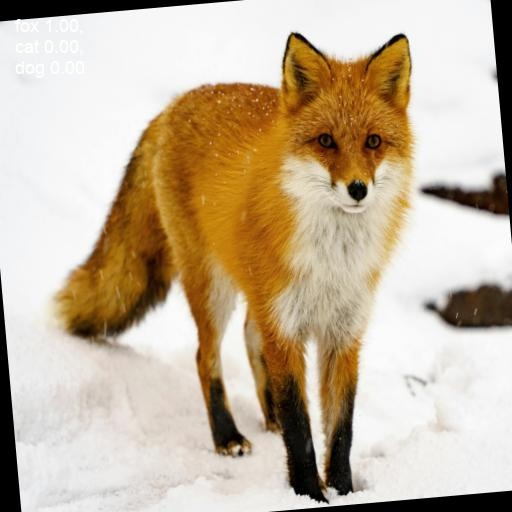

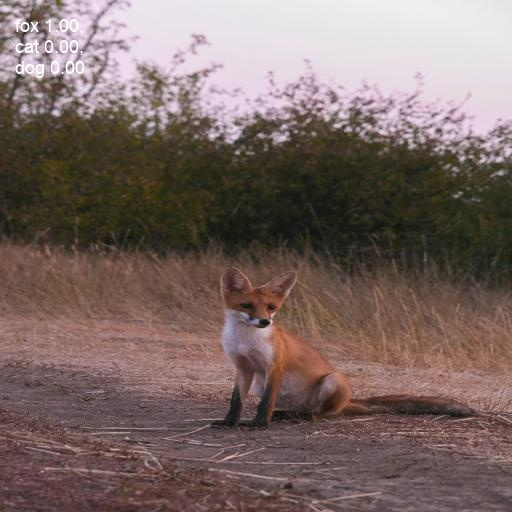

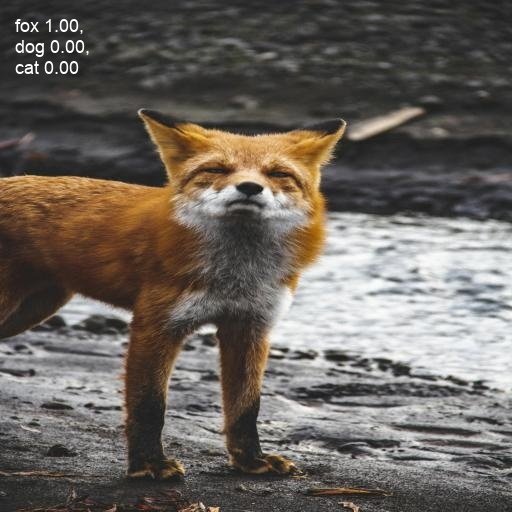

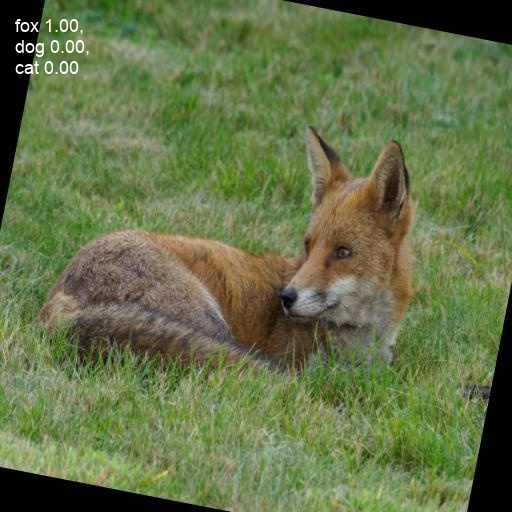

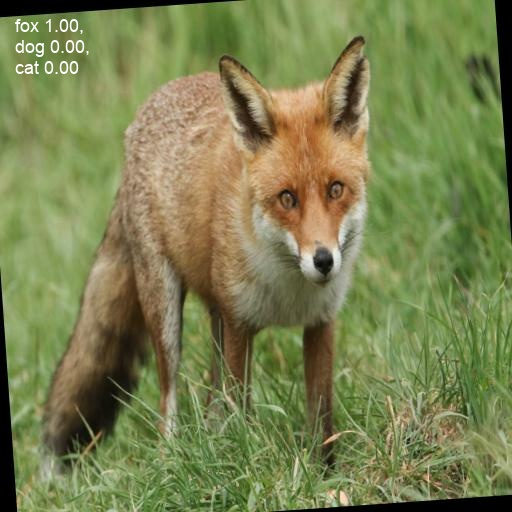

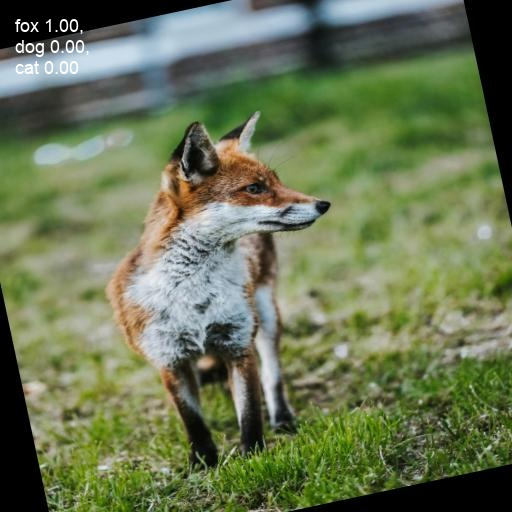

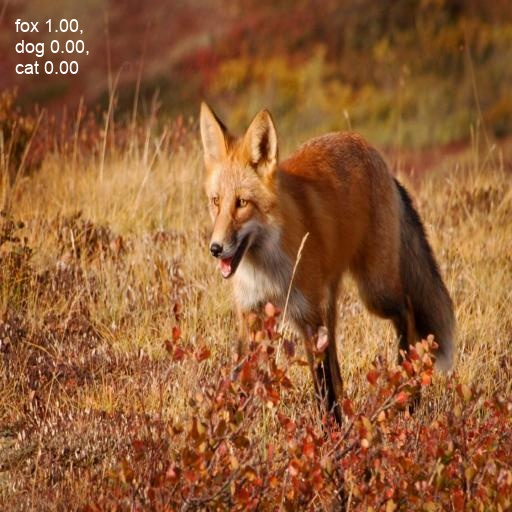

In [ ]:
import glob
import random

from IPython.display import Image, display

# Get all image paths
image_paths = glob.glob(f'{HOME}/runs/classify/predict/*.jpg')

# Select up to 20 random images
random_images = random.sample(image_paths, min(len(image_paths), 10))

# Display the selected images
for image_path in random_images:
    display(Image(filename=image_path, width=600))

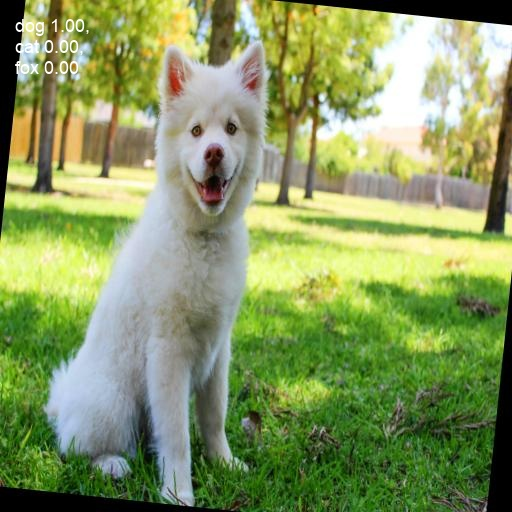

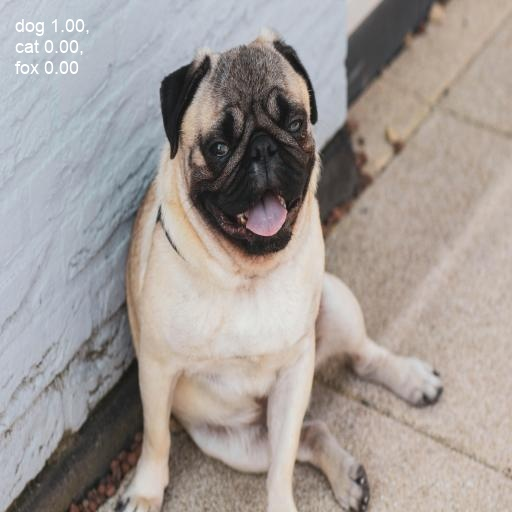

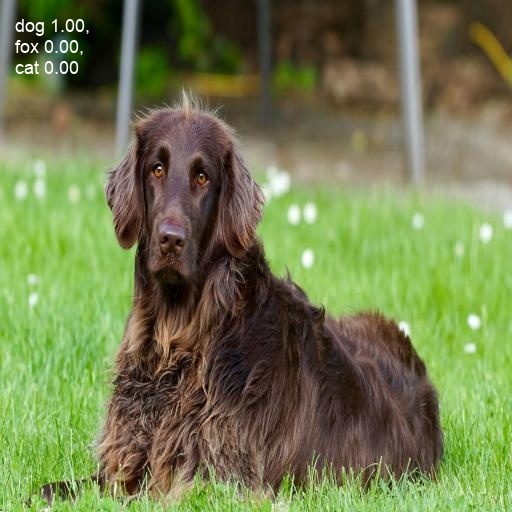

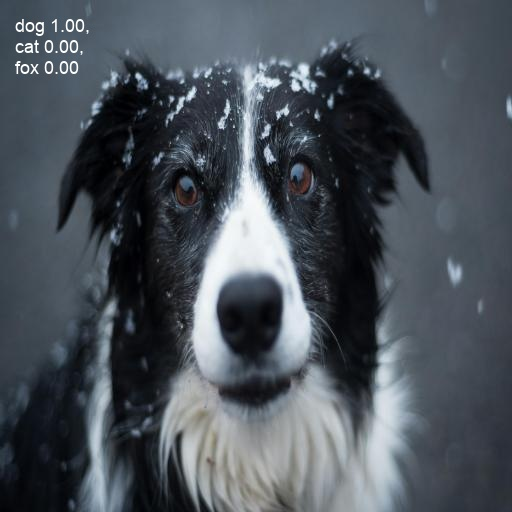

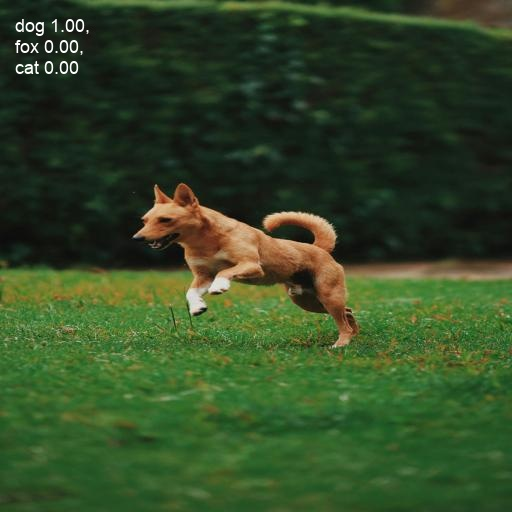

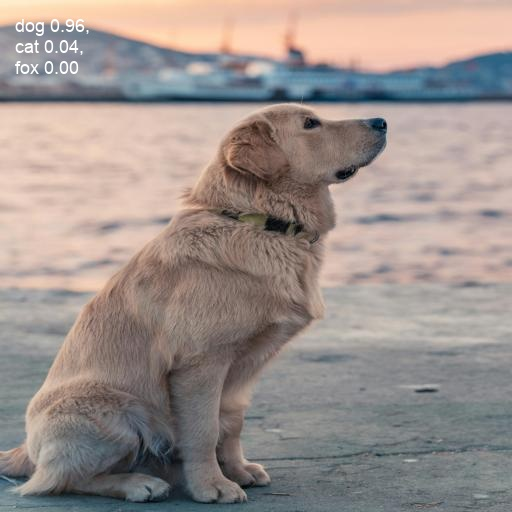

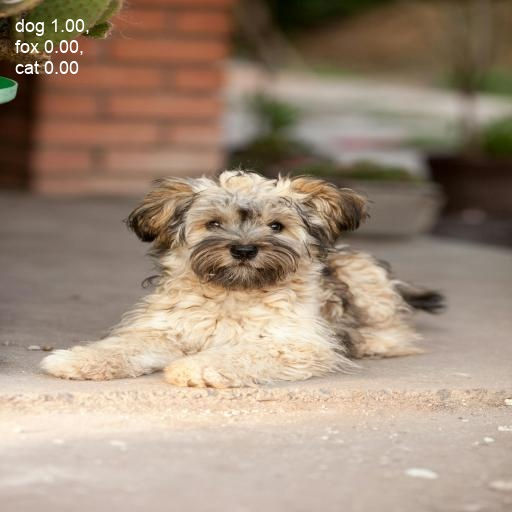

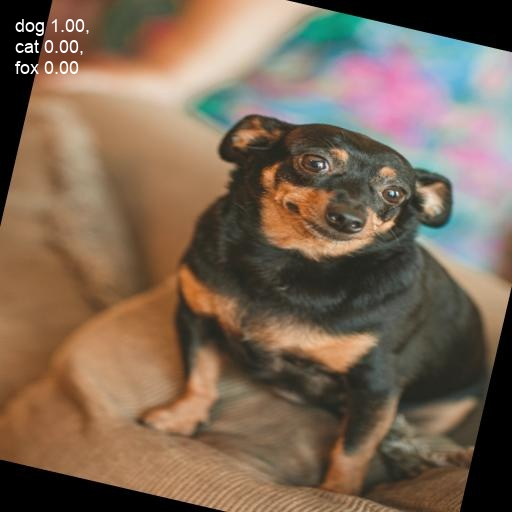

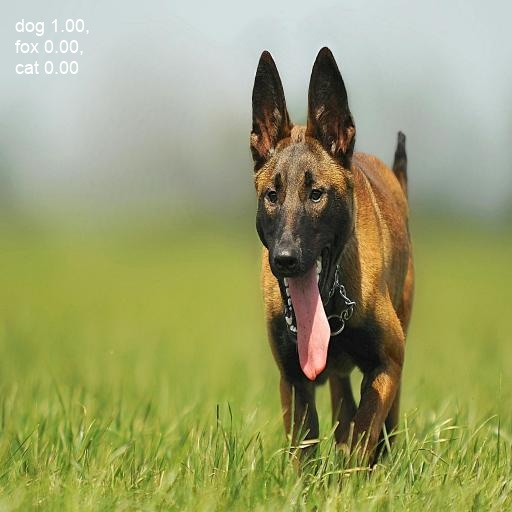

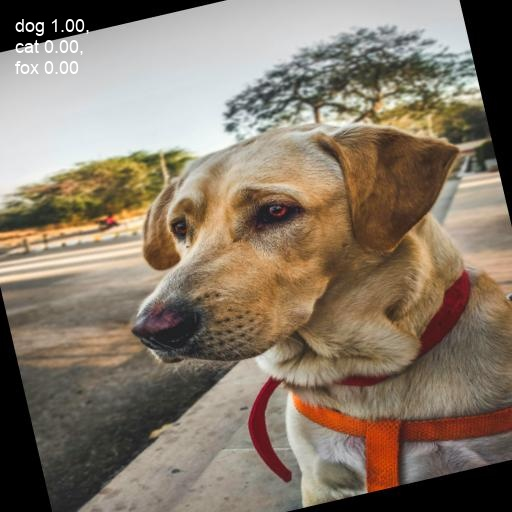

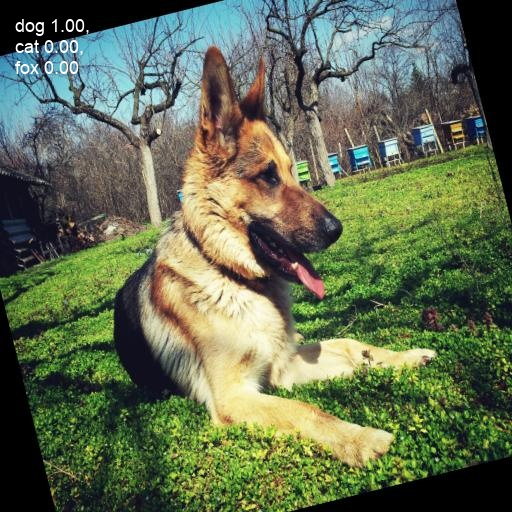

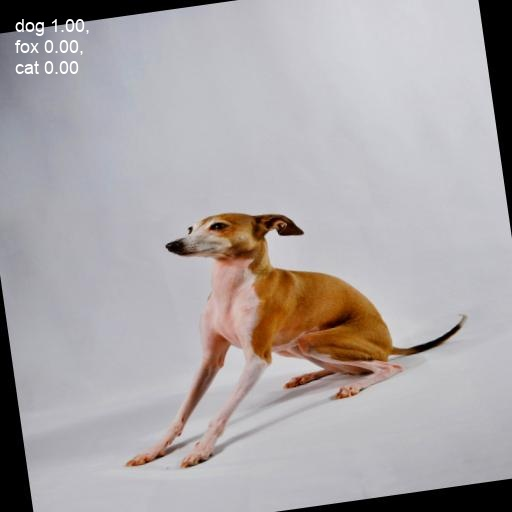

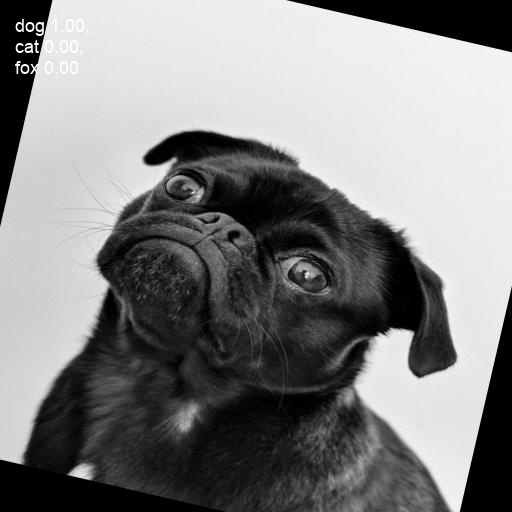

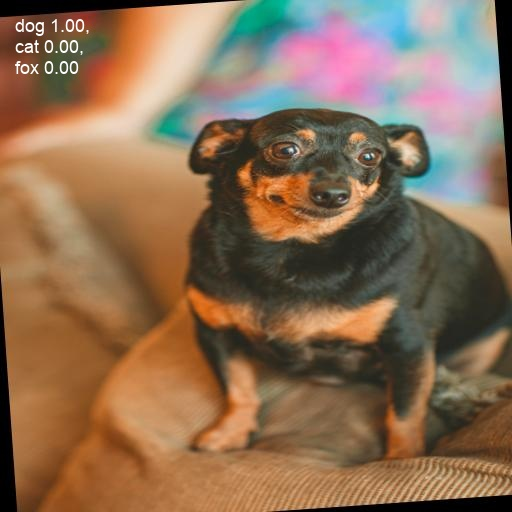

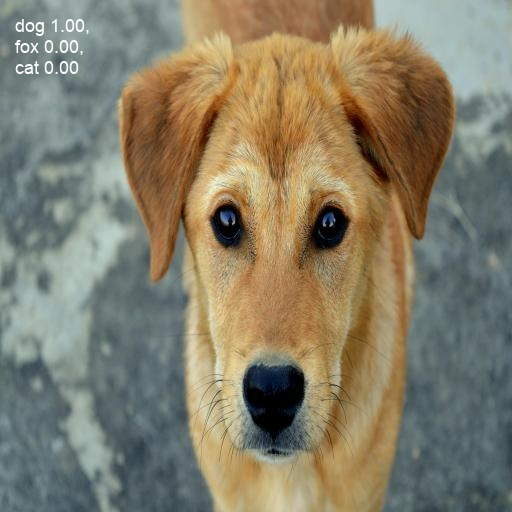

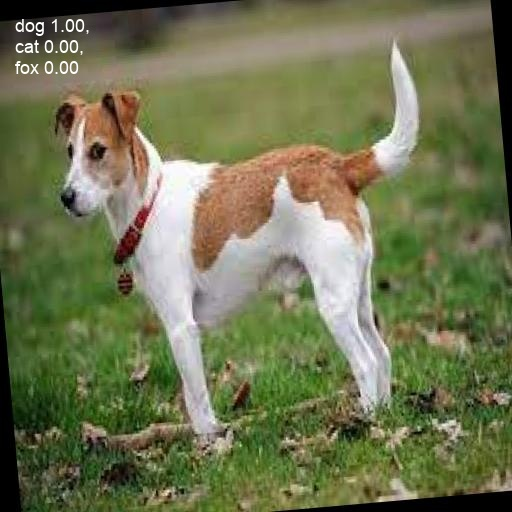

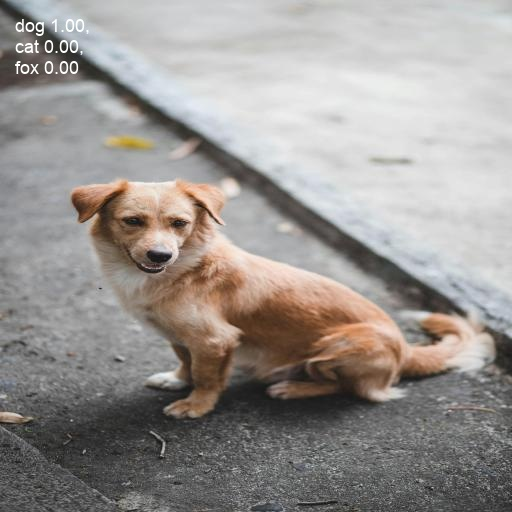

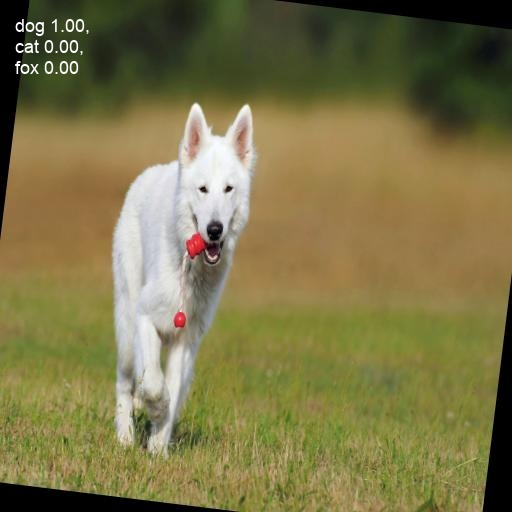

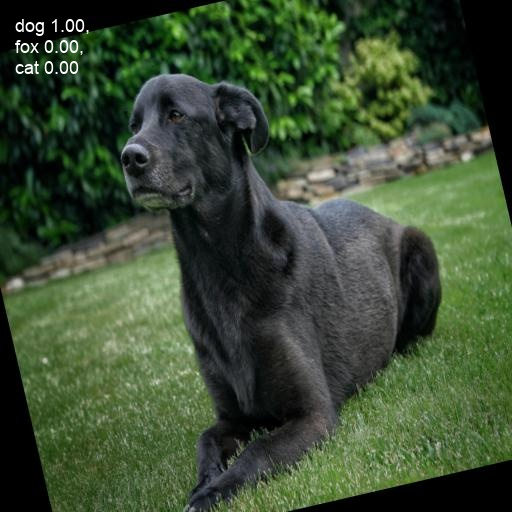

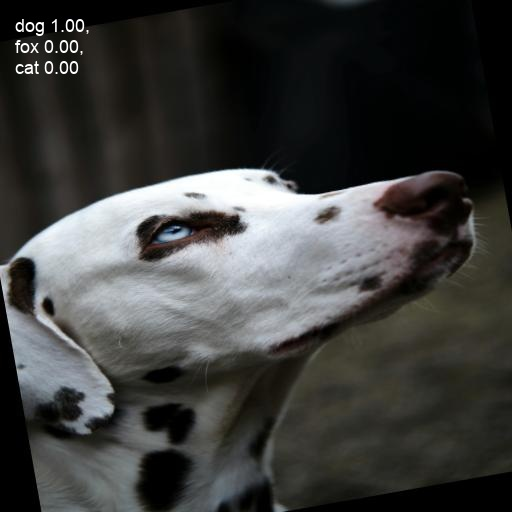

In [ ]:
import glob
import random

from IPython.display import Image, display

# Get all image paths
image_paths = glob.glob(f'{HOME}/runs/classify/predict3/*.jpg')

# Select up to 20 random images
random_images = random.sample(image_paths, min(len(image_paths), 20))

# Display the selected images
for image_path in random_images:
    display(Image(filename=image_path, width=600))

## Conclusion

This is a simple example of how to train a YOLOv8 classification model on a custom dataset from Oslo. You can use this as a starting point to train your own models on your own datasets.